## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [1]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/Yurohime/DATA-MINING-SEMESTER-5/refs/heads/main/datasets/property_dataset.csv')

df.sample(10)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
17,Standard,Mulyorejo,144.0,182.0,4.0,3.0,2.0,2100000000,Belum,Selatan,Standard,1-2 Mobil
60,Standard,Gunung Anyar Mas,100.0,190.0,4.0,4.0,3.0,895000000,Belum,NaN,Standard,> 2 Mobil
51,Standard,Lebak Rejo,32.0,64.0,2.0,2.0,2.0,440000000,Belum,NaN,Standard,1-2 Mobil
24,Standard,Gubeng,200.0,180.0,4.0,3.0,1.0,3200000000,Belum,Utara,Standard,1-2 Mobil
138,Premium,Graha Family,240.0,345.0,4.0,4.0,2.0,6000000000,Belum,Selatan,Standard,1-2 Mobil
214,Standard,Medokan Ayu,60.0,100.0,2.0,2.0,2.0,600000000,Belum,Timur,NaN,1-2 Mobil
199,Standard,Sukolilo,160.0,160.0,4.0,3.0,1.5,2100000000,Belum,NaN,NaN,1-2 Mobil
57,Standard,Wisata Semanggi,72.0,50.0,2.0,1.0,1.0,650000000,Belum,Selatan,Standard,1-2 Mobil
134,Premium,Pakuwon City,240.0,300.0,5.0,5.0,2.0,4888888888,Belum,Timur,Tikungan/Hook,> 2 Mobil
170,Below Standard,Rungkut,60.0,50.0,2.0,1.0,1.0,595000000,Belum,Selatan,NaN,1-2 Mobil


In [51]:
df.describe()


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [53]:
df.isnull().sum()

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [54]:
df.isnull().sum() / len(df) * 100

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [55]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed.head(5)


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [56]:
df_imputed.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [57]:
df_dropped = df_imputed.drop('Nama Daerah', axis=1)
df_dropped.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [58]:
label_encoders = {}
categorical_cols = ['Area Category','Terjual/Belum','Posisi Rumah','Arah Hadap Rumah','Tingkat/Lantai ','Lebar Jalan Depan Rumah (ROW)']
for col in categorical_cols:
    le = LabelEncoder()
    df_dropped[col] = le.fit_transform(df_dropped[col])
    label_encoders[col] = le

df_dropped.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2,3500000000,0,3,2,0
1,0,30.0,60.0,2.0,1.0,2,287799000,0,3,2,1
2,3,170.0,170.0,5.0,4.0,2,2699999999,0,1,0,0
3,2,187.0,250.0,5.0,5.0,2,3100000000,0,3,2,0
4,1,350.0,600.0,5.0,5.0,2,5000000000,0,0,2,0


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [59]:
df_dropped['Harga Penawaran (dari Owner)'] = df_dropped['Harga Penawaran (dari Owner)'].replace(" ", "10500000000")
df_dropped['Harga Penawaran (dari Owner)'] = df_dropped['Harga Penawaran (dari Owner)'].replace(r'^\d{1,3}(\.\d{3})*,00$', "10500000000", regex=True)


check the data type

In [60]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    int64 
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int64 
 9   Posisi Rumah                   308 non-null    int64 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [63]:
columns_to_convert = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Harga Penawaran (dari Owner)']
for column in columns_to_convert:
    df_dropped[column] = pd.to_numeric(df_dropped[column], errors='coerce').fillna(0).astype(int)

In [64]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [65]:
# scaling data
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()

df_new = pd.DataFrame(sc.fit_transform(df_dropped), columns=["Area Category","Luas Tanah (m2)","Luas Bangunan (m2)","Jumlah Kamar","Jumlah Kamar Mandi","Tingkat/Lantai","Harga Penawaran (dari Owner)","Terjual/Belum","Arah Hadap Rumah","Posisi Rumah","Lebar Jalan Depan Rumah (ROW)"])
scaled_data = sc.fit_transform(df_dropped)

df_new.head(5)


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,1.004372,0.064760,0.156529,-0.168161,-0.207847,0.286514,-0.182491,0.0,0.839497,-0.188069,-0.825581
1,-1.677824,-0.977457,-0.971209,-1.386831,-1.438941,0.286514,-0.569600,0.0,0.839497,-0.188069,0.220834
2,1.004372,-0.282646,-0.454330,0.441174,0.407700,0.286514,-0.278901,0.0,-1.141845,-5.453988,-0.825581
3,0.110307,-0.198276,-0.078417,0.441174,1.023247,0.286514,-0.230696,0.0,0.839497,-0.188069,-0.825581
4,-0.783759,0.610683,1.566201,0.441174,1.023247,0.286514,-0.001723,0.0,-2.132516,-0.188069,-0.825581


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

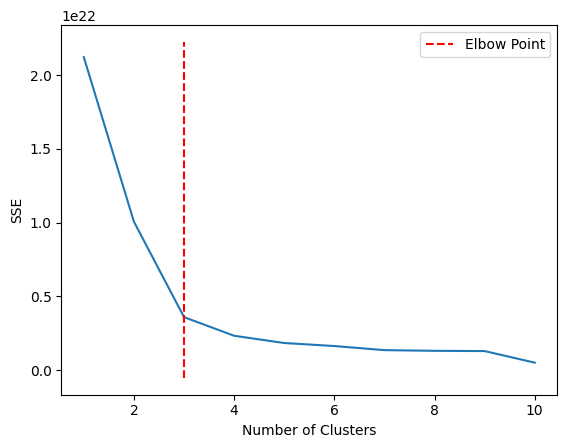

In [66]:
from sklearn.cluster import KMeans
sse=[]
for i in range(1,11) :
    kmeans = KMeans(n_clusters=i, init='random',max_iter=300,random_state=42)
    kmeans.fit(df_dropped)
    sse.append(kmeans.inertia_)

knee = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
plt.plot(range(1,11),sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='--', colors='red', label='Elbow Point')
plt.legend()
plt.show()

In [67]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [68]:
kmeans = KMeans(n_clusters=3, init='random',max_iter=300,random_state=42)

y_pred = kmeans.fit_predict(df_dropped)

y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [69]:
# Inverse transform the scaled data to get the original values
df_inv = pd.DataFrame(sc.inverse_transform(df_new),columns=["Area Category","Luas Tanah (m2)","Luas Bangunan (m2)","Jumlah Kamar","Jumlah Kamar Mandi","Tingkat/Lantai","Harga Penawaran (dari Owner)","Terjual/Belum","Arah Hadap Rumah","Posisi Rumah","Lebar Jalan Depan Rumah (ROW)"])

df_inv['Cluster'] = y_pred

df_inv.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,0.0,3.0,2.0,0.0,0
1,0.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,0.0,3.0,2.0,1.0,0
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,0.0,1.0,0.0,0.0,0
3,2.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,0.0,3.0,2.0,0.0,0
4,1.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,0.0,0.0,2.0,0.0,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [89]:
# aggregation
cluster_summary = df_inv.groupby(y_pred).agg(
    {
        'Area Category': ['mean', 'min', 'max'],
        'Luas Tanah (m2)': ['mean', 'min', 'max'],
        'Luas Bangunan (m2)': ['mean', 'min', 'max'],
        'Jumlah Kamar': ['mean', 'std', 'max'],
        'Jumlah Kamar Mandi': ['mean', 'min', 'max'],
        'Tingkat/Lantai': ['mean', 'min', 'max'],
        'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max'],
        'Terjual/Belum': ['mean', 'std', 'min', 'max'],
        'Arah Hadap Rumah': ['mean', 'std', 'min', 'max'],
        'Posisi Rumah': ['mean', 'std', 'min', 'max'],
        'Lebar Jalan Depan Rumah (ROW)': ['mean', 'std', 'min', 'max']
    }
)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary = cluster_summary.transpose()

cluster_summary

cluster                                        0             1             2
Area Category                 mean  1.881481e+00  1.805556e+00  2.500000e+00
                              min   0.000000e+00  0.000000e+00  2.000000e+00
                              max   3.000000e+00  3.000000e+00  3.000000e+00
Luas Tanah (m2)               mean  1.721259e+02  6.090833e+02  7.500000e+02
                              min   1.400000e+01  1.800000e+02  6.000000e+02
                              max   8.500000e+02  1.561000e+03  9.000000e+02
Luas Bangunan (m2)            mean  2.147000e+02  6.241944e+02  8.500000e+02
                              min   1.400000e+01  2.400000e+02  6.000000e+02
                              max   8.500000e+02  1.200000e+03  1.100000e+03
Jumlah Kamar                  mean  4.059259e+00  5.777778e+00  6.500000e+00
                              std   1.581787e+00  1.221501e+00  7.071068e-01
                              max   1.300000e+01  8.000000e+00  7.000000e+00
Jumlah Kamar Mandi            mean  3.129630e+00  4.805556e+00  5.000000e+00
                              min   1.000000e+00  2.000000e+00  5.000000e+00
                              max   1.300000e+01  8.000000e+00  5.000000e+00
Tingkat/Lantai                mean  1.688889e+00  1.916667e+00  1.000000e+00
                              min   0.000000e+00  0.000000e+00  0.000000e+00
                              max   5.000000e+00  4.000000e+00  2.000000e+00
Harga Penawaran (dari Owner)  mean  2.819814e+09  1.739042e+10  7.850000e+10
                              std   2.060465e+09  6.783141e+09  2.899138e+10
                              min   1.600000e+08  1.050000e+10  5.800000e+10
                              max   9.500000e+09  3.999999e+10  9.900000e+10
Terjual/Belum                 mean  0.000000e+00  0.000000e+00  0.000000e+00
                              std   0.000000e+00  0.000000e+00  0.000000e+00
                              min   0.000000e+00  0.000000e+00  0.000000e+00
                              max   0.000000e+00  0.000000e+00  0.000000e+00
Arah Hadap Rumah              mean  2.151852e+00  2.194444e+00  1.500000e+00
                              std   1.010675e+00  9.803627e-01  2.121320e+00
                              min   0.000000e+00  0.000000e+00  0.000000e+00
                              max   3.000000e+00  3.000000e+00  3.000000e+00
Posisi Rumah                  mean  2.066667e+00  2.083333e+00  2.500000e+00
                              std   3.383757e-01  6.035609e-01  7.071068e-01
                              min   0.000000e+00  0.000000e+00  2.000000e+00
                              max   4.000000e+00  4.000000e+00  3.000000e+00
Lebar Jalan Depan Rumah (ROW) mean  7.518519e-01  1.055556e+00  1.000000e+00
                              std   9.452957e-01  1.012619e+00  1.414214e+00
                              min   0.000000e+00  0.000000e+00  0.000000e+00
                              max   2.000000e+00  2.000000e+00  2.000000e+00

In [71]:
# count data from each cluster
df_inv.groupby("Cluster")["Cluster"].agg(pd.Series.count)

,Cluster
Cluster,
0,270
1,36
2,2


## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

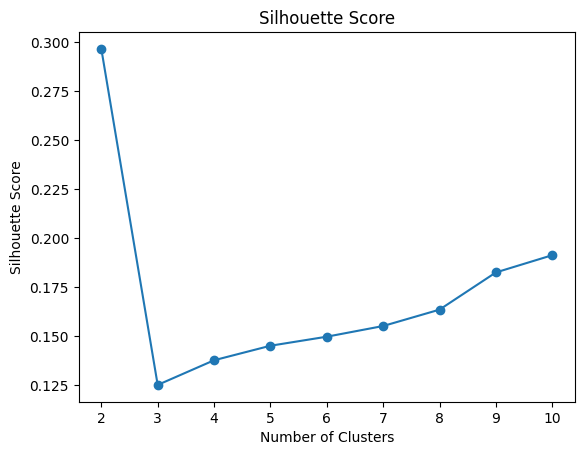

In [82]:
# The image below is not the final result, if yours looks different, that’s okay.

from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    cluster_labels = fcluster(linkage(df_new, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_new, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [73]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_new)


In [74]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
df_inv2 = pd.DataFrame(sc.inverse_transform(df_new),columns=["Area Category","Luas Tanah (m2)","Luas Bangunan (m2)","Jumlah Kamar","Jumlah Kamar Mandi","Tingkat/Lantai","Harga Penawaran (dari Owner)","Terjual/Belum","Arah Hadap Rumah","Posisi Rumah","Lebar Jalan Depan Rumah (ROW)"])

df_inv2['KMeans'] = y_pred
df_inv2['Agglo'] = y_hc



# show the df
df_inv2.head()


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,Agglo
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,0.0,3.0,2.0,0.0,0,0
1,0.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,0.0,3.0,2.0,1.0,0,0
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,0.0,1.0,0.0,0.0,0,1
3,2.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,0.0,3.0,2.0,0.0,0,0
4,1.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,0.0,0.0,2.0,0.0,0,1


Display the cluster summary in the form of a dataframe.

In [75]:
# Agglo
cluster_summary = df_inv2.groupby(y_hc).agg(
    {
        'Area Category': ['mean', 'std', 'min', 'max'],
        'Luas Tanah (m2)': ['mean', 'std', 'min', 'max'],
        'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
        'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
        'Tingkat/Lantai': ['mean', 'std', 'min', 'max'],
    }
)

cluster_summary = cluster_summary.rename_axis('Agglo')

cluster_summary = cluster_summary.transpose()

cluster_summary

Agglo                             0            1           2
Area Category      mean    1.946429     1.873016    1.727273
                   std     1.258546     0.851792    0.981893
                   min     0.000000     0.000000    0.000000
                   max     3.000000     3.000000    3.000000
Luas Tanah (m2)    mean  137.059524   513.492063  188.636364
                   std    83.086615   251.945262  100.856061
                   min    14.000000   160.000000   34.000000
                   max   495.000000  1561.000000  450.000000
Luas Bangunan (m2) mean  160.565476   583.000000  239.428571
                   std    93.692748   226.319785  117.830658
                   min    14.000000   170.000000   50.000000
                   max   495.000000  1200.000000  600.000000
Jumlah Kamar       mean    3.488095     6.158730    4.454545
                   std     1.193737     1.536716    1.230591
                   min     1.000000     3.000000    2.000000
                   max     7.000000    13.000000    8.000000
Tingkat/Lantai     mean    1.488095     1.984127    1.974026
                   std     1.094286     1.170774    0.361795
                   min     0.000000     0.000000    0.000000
                   max     4.000000     5.000000    3.000000

In [76]:
# Agglo
cluster_summary = df_inv2.groupby(y_hc).agg(
    {
        'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max'],
        'Terjual/Belum': ['mean', 'std', 'min', 'max'],
        'Arah Hadap Rumah': ['mean', 'std', 'min', 'max'],
        'Posisi Rumah': ['mean', 'std', 'min', 'max'],
        'Lebar Jalan Depan Rumah (ROW)': ['mean', 'std', 'min', 'max']
    }
)

cluster_summary = cluster_summary.rename_axis('Agglo')

cluster_summary = cluster_summary.transpose()

cluster_summary

Agglo                                          0             1             2
Harga Penawaran (dari Owner)  mean  2.146291e+09  1.440278e+10  3.590297e+09
                              std   1.667162e+09  1.457836e+10  2.501418e+09
                              min   1.600000e+08  2.500000e+09  6.450000e+08
                              max   1.050000e+10  9.900000e+10  1.450000e+10
Terjual/Belum                 mean  0.000000e+00  0.000000e+00  0.000000e+00
                              std   0.000000e+00  0.000000e+00  0.000000e+00
                              min   0.000000e+00  0.000000e+00  0.000000e+00
                              max   0.000000e+00  0.000000e+00  0.000000e+00
Arah Hadap Rumah              mean  2.107143e+00  2.142857e+00  2.259740e+00
                              std   1.049869e+00  1.029518e+00  9.090567e-01
                              min   0.000000e+00  0.000000e+00  0.000000e+00
                              max   3.000000e+00  3.000000e+00  3.000000e+00
Posisi Rumah                  mean  2.017857e+00  1.984127e+00  2.259740e+00
                              std   1.328280e-01  5.533494e-01  4.974302e-01
                              min   2.000000e+00  0.000000e+00  2.000000e+00
                              max   3.000000e+00  3.000000e+00  4.000000e+00
Lebar Jalan Depan Rumah (ROW) mean  3.571429e-01  7.619048e-01  1.753247e+00
                              std   7.199943e-01  9.790431e-01  6.520382e-01
                              min   0.000000e+00  0.000000e+00  0.000000e+00
                              max   2.000000e+00  2.000000e+00  2.000000e+00

In [77]:
df_inv2.Agglo.value_counts()

,count
Agglo,
0,168
2,77
1,63


**Hierarchical Visualization**

Single Linkage

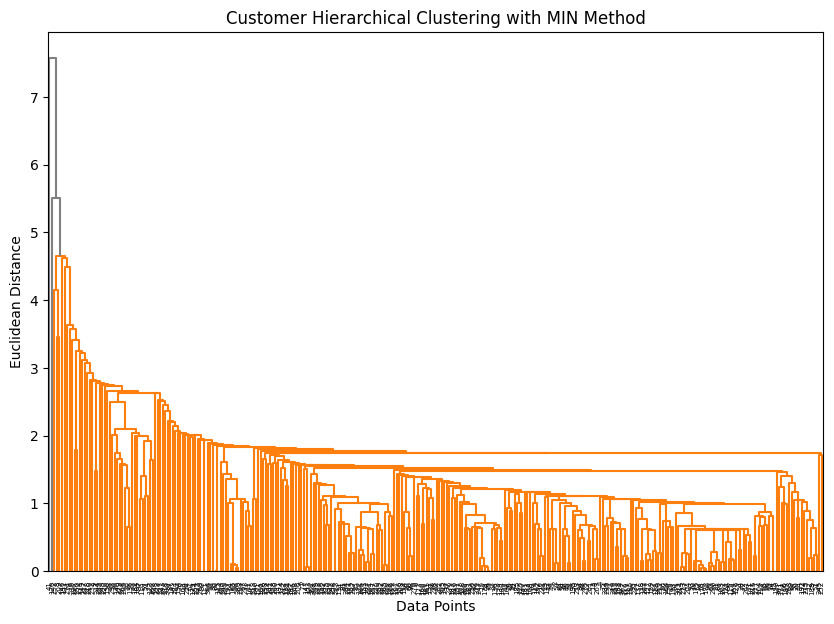

In [78]:
# Min Distance
# Buat linkage matrix
linked = linkage(df_new, method='single')

# Tentukan jumlah cluster yang diinginkan
n_clusters = 3

# Gunakan fcluster untuk mendapatkan label cluster
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

# Tentukan color_threshold agar sesuai dengan pemotongan untuk 4 cluster
color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,  # Menentukan ketinggian pemotongan sesuai jumlah cluster
           above_threshold_color='grey',     # Warna cabang di atas threshold
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Customer Hierarchical Clustering with MIN Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

complete linkage

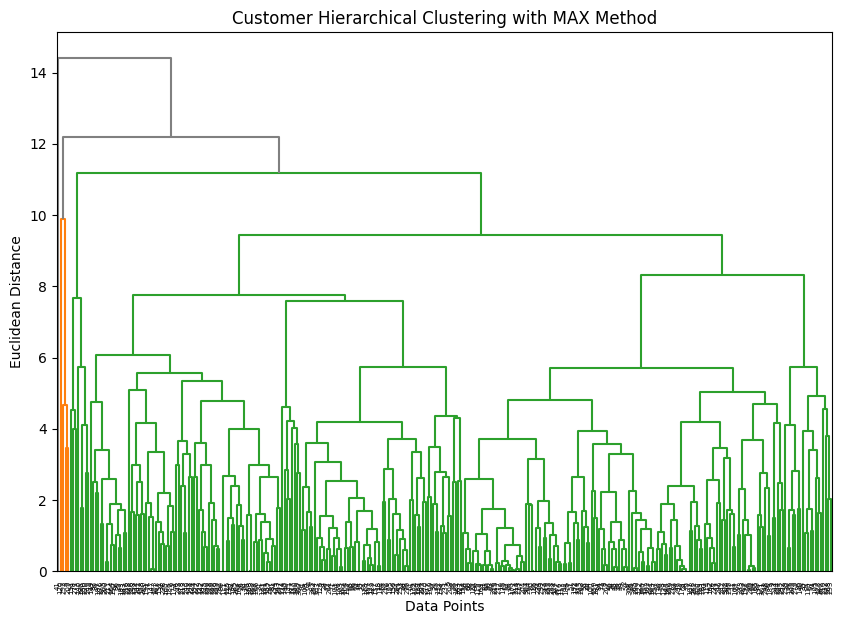

In [79]:
# Max Distance
n_clusters = 3
linked = linkage(df_new, method='complete', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Customer Hierarchical Clustering with MAX Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

average linkage

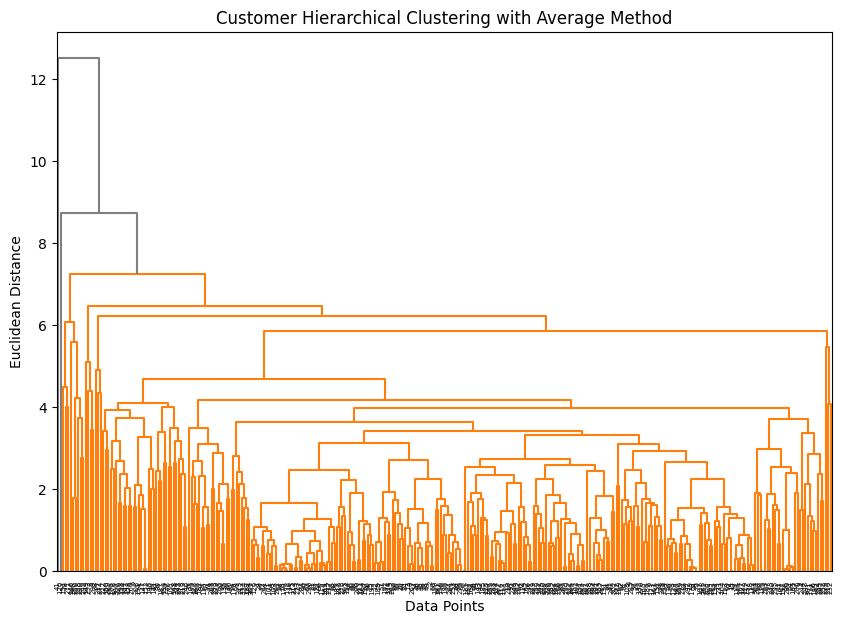

In [80]:
# Average Distance
n_clusters = 3
linked = linkage(df_new, method='average', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Customer Hierarchical Clustering with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

ward method

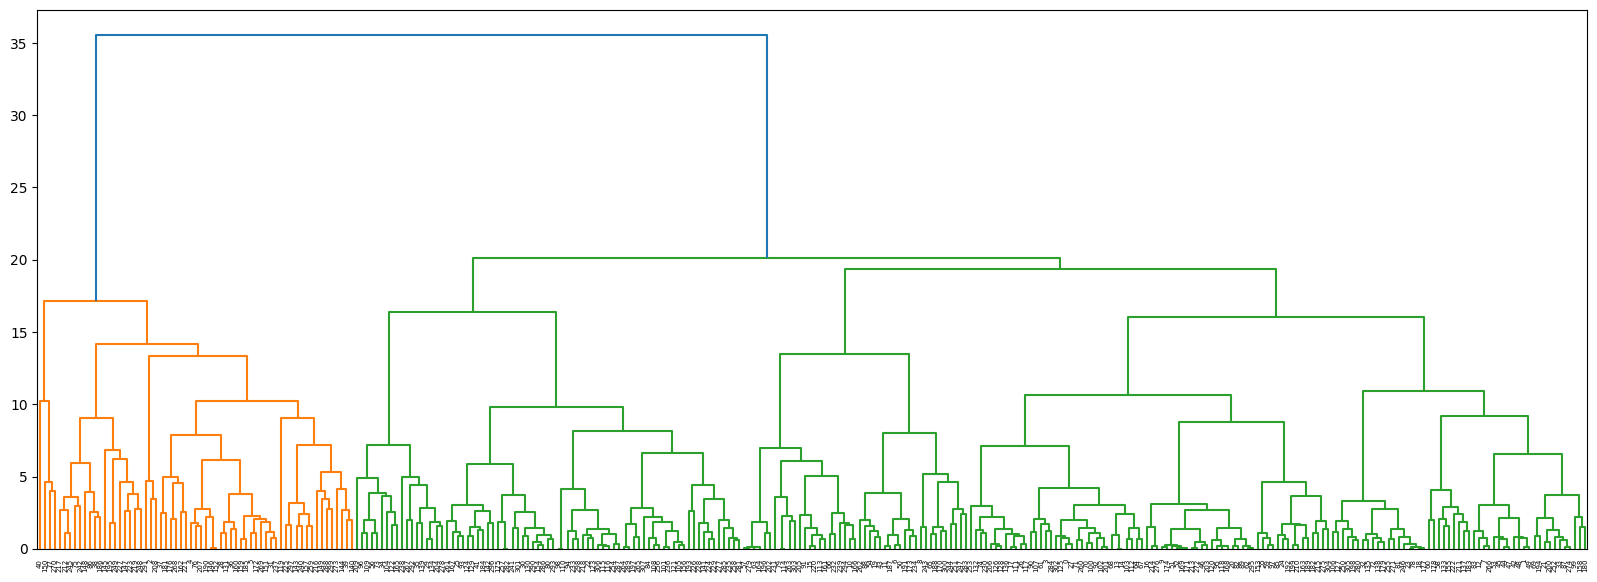

In [81]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_new, method='ward')
dendrogram(linkage_data)
plt.show()